# E-commerce Customer Data For Behavior Analysis

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("B:\\Documents\\Harkeerat\\DATASETS for projects\\E-commerce Customer Behavior - Sheet1.csv")

### Exploring the dataset

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

Thus there are two null values in 'Satisfaction Level' column

In [6]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


Count: The number of non-null values in each column. All columns have 350 non-null values, indicating that there are no missing values.

Mean: The average value of each column. For example, the mean age is approximately 33.6, the mean total spend is approximately 845.3.

Std (Standard Deviation): A measure of the amount of variation or dispersion in a set of values. It shows how much the values deviate from the mean. Larger standard deviations indicate more spread out data.

Min: The minimum value in each column. For instance, the minimum age is 26, the minimum total spend is 410.8.

25%: The first quartile or 25th percentile. This is the value below which 25% of the data falls. It gives an idea about the spread of the lower values. For example the "Age" column, the 25th percentile (Q1) is 30. This means that 25% of the customers have an age less than or equal to 30.

50%: The median or 50th percentile. It is the middle value of the data. It's also referred to as the median age, median total spend. For the "Age" column, the median is 32.5. This indicates that 50% of the customers have an age less than or equal to 32.5, and 50% have an age greater than or equal to 32.5.

75%: The third quartile or 75th percentile. This is the value below which 75% of the data falls. It gives an idea about the spread of the higher values.  The 75th percentile (Q3) is 37. This means that 75% of the customers have an age less than or equal to 37.

These percentiles help to understand the distribution of the data and identify points where data is concentrated or spread out. For instance, if the 75th percentile is much higher than the 25th percentile, it suggests a right-skewed distribution, indicating that a significant portion of the data has higher values. If the percentiles are evenly distributed, the data might have a more symmetrical distribution.

Max: The maximum value in each column. For example,  the maximum age is 43, the maximum total spend is 1520.1.

In [7]:
# Dropping the null values
df.dropna(inplace=True) 

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

The null values have been deleted.

### Data Visualization

In [10]:
df['Gender'].value_counts().reset_index()

,index,Gender
0,Male,175
1,Female,173


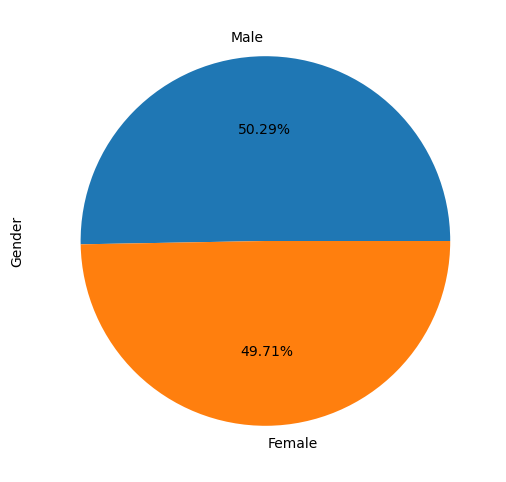

In [11]:
# visualize the Gender column
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

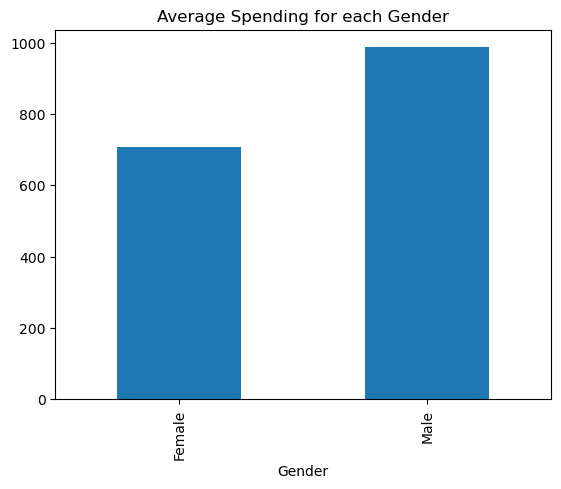

In [12]:
# Relation between the average spending and gender
gender_spend = df.groupby('Gender')['Total Spend'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

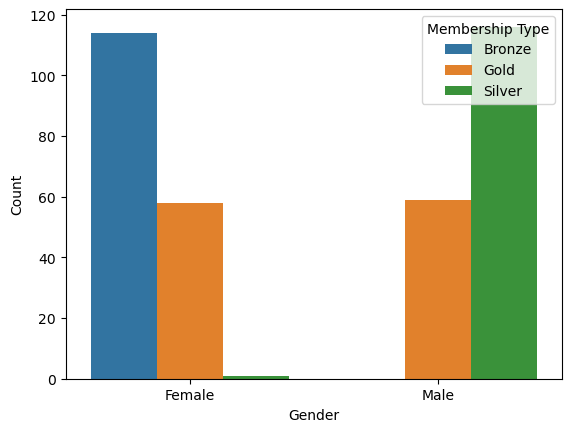

In [13]:
# Counting the occurrences of each combination of 'Gender' and 'Membership Type'
gender_membership = df.groupby(['Gender', 'Membership Type']).size().reset_index(name='Count')

# Creating a bar plot
sns.barplot(data=gender_membership, x='Gender', y='Count', hue='Membership Type')

plt.show()

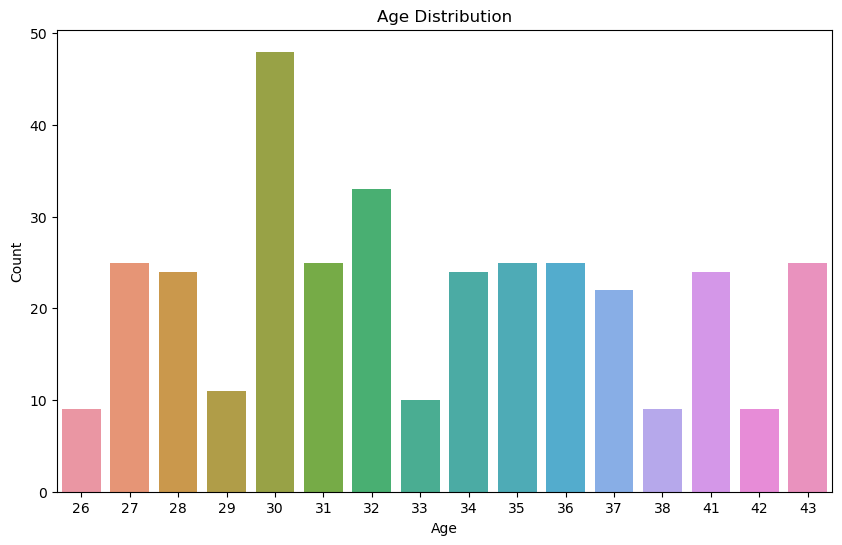

In [14]:
# Counting the occurrences of each age
age_data = df['Age'].value_counts().reset_index()

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='index', y='Age')  # 'index' represents the age values
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

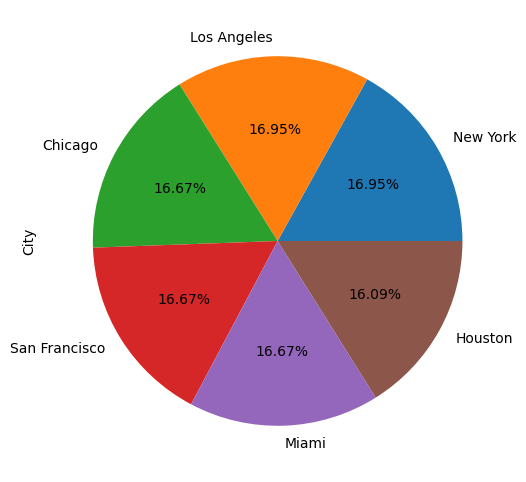

In [15]:
# visualize customer by city through pie chart

plt.figure(figsize=(10, 6))
df['City'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

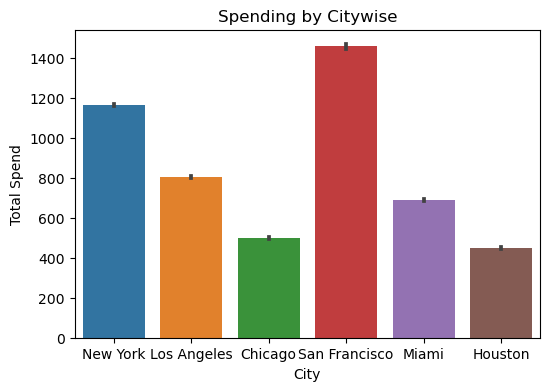

In [16]:
# To know the total spend citywise

plt.figure(figsize=(6, 4))

sns.barplot(data=df, x='City', y='Total Spend')
plt.title("Spending by Citywise")
plt.show()

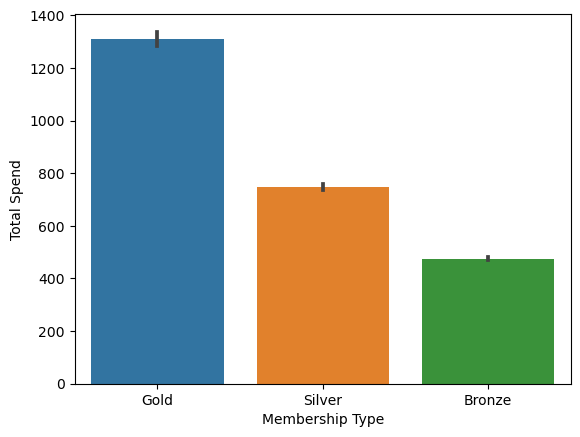

In [17]:
#How spending is affected my membership type

sns.barplot(data=df, x='Membership Type', y='Total Spend')
plt.show()

The visualization shows that the "Gold" membership type has the topmost total spend compared to the "Bronze" membership type, it suggests that, on average, customers with a "Gold" membership spend more money than those with a "Bronze" membership. Here are some potential interpretations:

(a) Higher Average Spending: Customers with a "Gold" membership, on average, spend more money than customers with a "Bronze" membership. This might indicate that "Gold" memberships are associated with higher-value customers who are willing to spend more on products or services.

(b) Premium Features or Services: The "Gold" membership might offer premium features, services, or benefits that attract customers willing to pay a higher price. The higher total spend could be a reflection of the added value provided by the "Gold" membership.

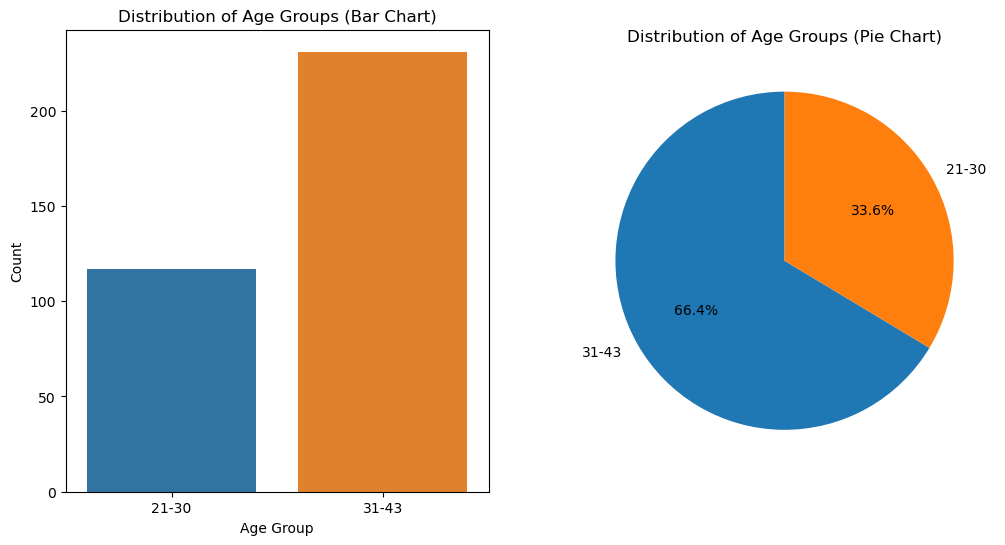

In [18]:
# What if I add another column Age Group and visualize the plots side by side

# Define age groups
age_grp = ['21-30', '31-43']

# Create the 'age_group' column
df['age_group'] = pd.cut(df.Age, bins=np.arange(15, 46, 15), labels=age_grp, right=True)

# Plot side-by-side bar and pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar Chart
sns.countplot(data=df, x='age_group', ax=axes[0])
axes[0].set_title('Distribution of Age Groups (Bar Chart)')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Pie Chart
age_group_counts = df['age_group'].value_counts()
axes[1].pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Age Groups (Pie Chart)')

plt.show()

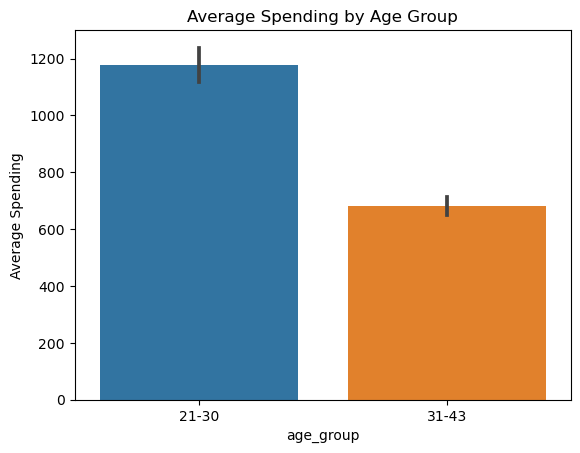

In [19]:
# average spending by age group
sns.barplot(data=df, x='age_group', y='Total Spend')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

 The age group between 21-30 spend more as compared to 31-43

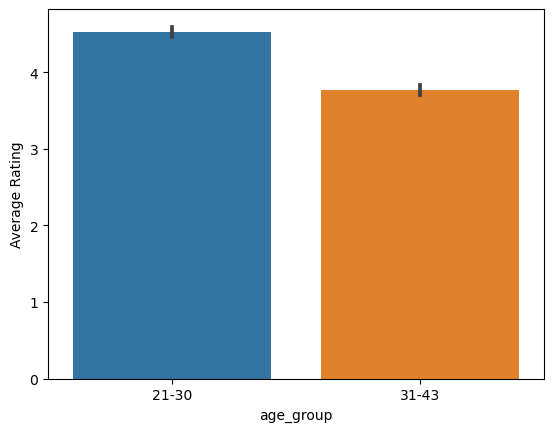

In [20]:
# average Rating by Age Group
sns.barplot(data=df, x='age_group', y='Average Rating')
plt.show()

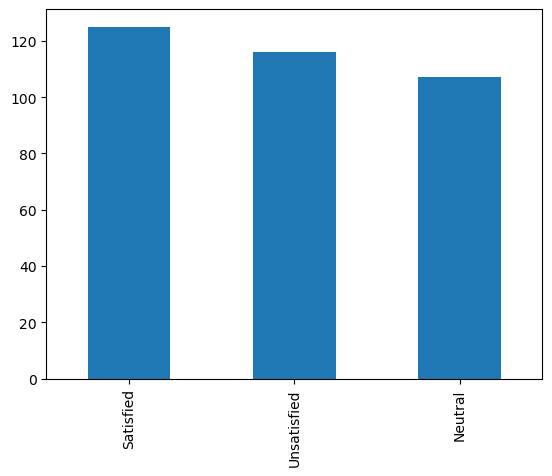

In [21]:


# visualize the distribution of Satisfaction Level
df['Satisfaction Level'].value_counts().plot.bar()
plt.show()



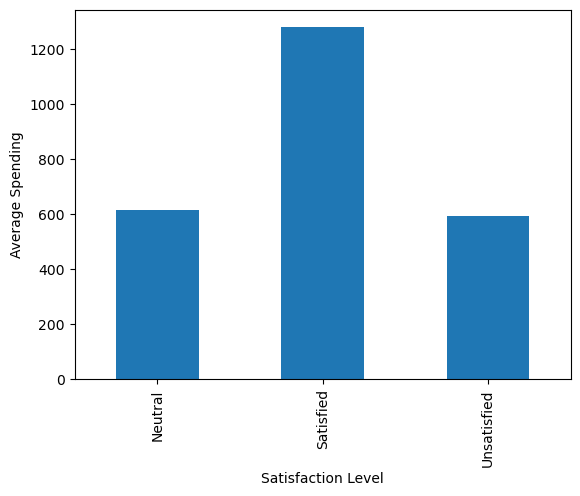

In [22]:
# find the relation between Satistaction Level and average spend
satisfaction_spend = df.groupby('Satisfaction Level')['Total Spend'].mean()
satisfaction_spend.plot.bar()
plt.ylabel('Average Spending')
plt.show()

When average spending is more there is higher satisfaction level as compare to less spending.

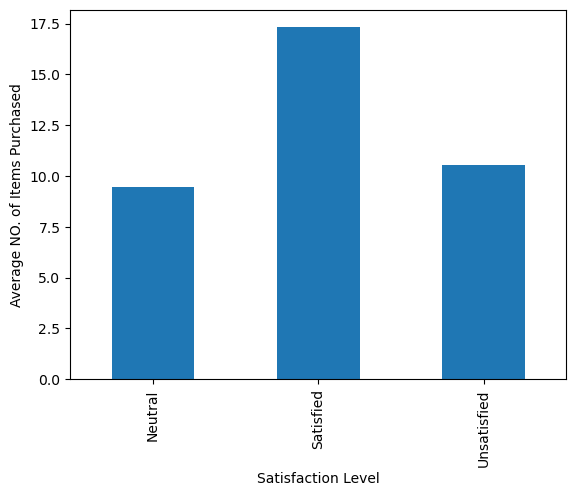

In [23]:
#  Satistaction Level and items purchased
satisfaction_items = df.groupby('Satisfaction Level')['Items Purchased'].mean()
satisfaction_items.plot.bar()
plt.ylabel('Average NO. of Items Purchased')
plt.show()